<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-all-necessary-libraries" data-toc-modified-id="Importing-all-necessary-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing all necessary libraries</a></span></li><li><span><a href="#Loading-the-dataset-using-pandas" data-toc-modified-id="Loading-the-dataset-using-pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the dataset using pandas</a></span></li><li><span><a href="#Exploring-and-analysing-the-dataset" data-toc-modified-id="Exploring-and-analysing-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring and analysing the dataset</a></span><ul class="toc-item"><li><span><a href="#Firstly,-let-us-roughly-analyse-the-dataset" data-toc-modified-id="Firstly,-let-us-roughly-analyse-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Firstly, let us roughly analyse the dataset</a></span></li><li><span><a href="#Statistics-of-numerical-attributes" data-toc-modified-id="Statistics-of-numerical-attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Statistics of numerical attributes</a></span></li><li><span><a href="#View-the-histogram-for-each-numerical-attribute" data-toc-modified-id="View-the-histogram-for-each-numerical-attribute-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>View the histogram for each numerical attribute</a></span></li><li><span><a href="#Analysing-categorical-data" data-toc-modified-id="Analysing-categorical-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Analysing categorical data</a></span></li><li><span><a href="#Computing-the-correlation-matrix-between-all-features" data-toc-modified-id="Computing-the-correlation-matrix-between-all-features-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Computing the correlation matrix between all features</a></span></li><li><span><a href="#Viewing-the-heatmap-of-the-correlation" data-toc-modified-id="Viewing-the-heatmap-of-the-correlation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Viewing the heatmap of the correlation</a></span></li><li><span><a href="#Displaying-the-correlation-of-the-input-features-witht-the-targeted-variable-(income)" data-toc-modified-id="Displaying-the-correlation-of-the-input-features-witht-the-targeted-variable-(income)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Displaying the correlation of the input features witht the targeted variable (income)</a></span></li><li><span><a href="#Displaying-the-scatter-matrix-for-numerical-data" data-toc-modified-id="Displaying-the-scatter-matrix-for-numerical-data-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Displaying the scatter matrix for numerical data</a></span></li></ul></li><li><span><a href="#Data-Prepocessing" data-toc-modified-id="Data-Prepocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prepocessing</a></span><ul class="toc-item"><li><span><a href="#Splitting-into-training-and-testing-set" data-toc-modified-id="Splitting-into-training-and-testing-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Splitting into training and testing set</a></span></li><li><span><a href="#Tackling-the-missing-values" data-toc-modified-id="Tackling-the-missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tackling the missing values</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Performing-One-hot-encoding" data-toc-modified-id="Performing-One-hot-encoding-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Performing One-hot encoding</a></span></li><li><span><a href="#Changing-y_train-into-a-boolean-vector" data-toc-modified-id="Changing-y_train-into-a-boolean-vector-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Changing y_train into a boolean vector</a></span></li></ul></li><li><span><a href="#Performing-Classification" data-toc-modified-id="Performing-Classification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performing Classification</a></span><ul class="toc-item"><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Tree</a></span></li></ul></li></ul></div>

# Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix

# Loading the dataset using pandas

In [2]:
# Setting the columns for the dataset
cols = ['age', 'workclass', 'fnlwgt', 
        'education', 'education-num', 
        'marital-status', 'occupation', 
        'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 
        'hours-per-week', 'native-country', 
        'income']

# Reading the dataset and storing into adult, we need to use na_values as some data have '?' as null values
adults1 = pd.read_csv('./Adults/adult.data', names = cols, index_col = False, na_values = [' ?'])
adults2 = pd.read_csv('./Adults/adult.test', names = cols, index_col = False, na_values = [' ?'])
adults = adults1.append(adults2)

# There are whitespaces in the csv file, use this function to remove it
adults_obj = adults.select_dtypes(['object'])
adults[adults_obj.columns] = adults_obj.apply(lambda x: x.str.strip())

# We convert the target variable to True (<=50K) and False (>50K) for easier handling
# adults.income = adults.income.map({'<=50K':0,'>50K':1})

# Peeking the first 5 rows of the dataset
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploring and analysing the dataset

## Firstly, let us roughly analyse the dataset

In [3]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


From the .info() method, we can see there are a total of **15 attributes** and **1 output label** which is **income**.

Observations:

1. Out of the **15 attributes**, 6 of it are numerical data, whereas the remaining 8 are categorical data.
2. There are a total of **48842 instances**
3. A total of 3 attributes contain missing values

Now let's analyse the output label:

In [4]:
adults.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Observations:
1. There are 2 distinct outputs, this is a **binary classification task**
2. The no. of people making more than \$50,000 are 7841
3. The no. of people making at most \$50,000 are 24720
4. The percentage of people making more than \$50,000 is approximately 24.08\%

There are some missing values detected, let's view those

In [5]:
adults.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

We may need to **impute** or even **drop** the missing values for workclass, occupation, and native-country

## Statistics of numerical attributes

In [6]:
# View the statistics of the numerical data
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Each numerical attribute have very different scale, **feature scaling** is needed

## View the histogram for each numerical attribute

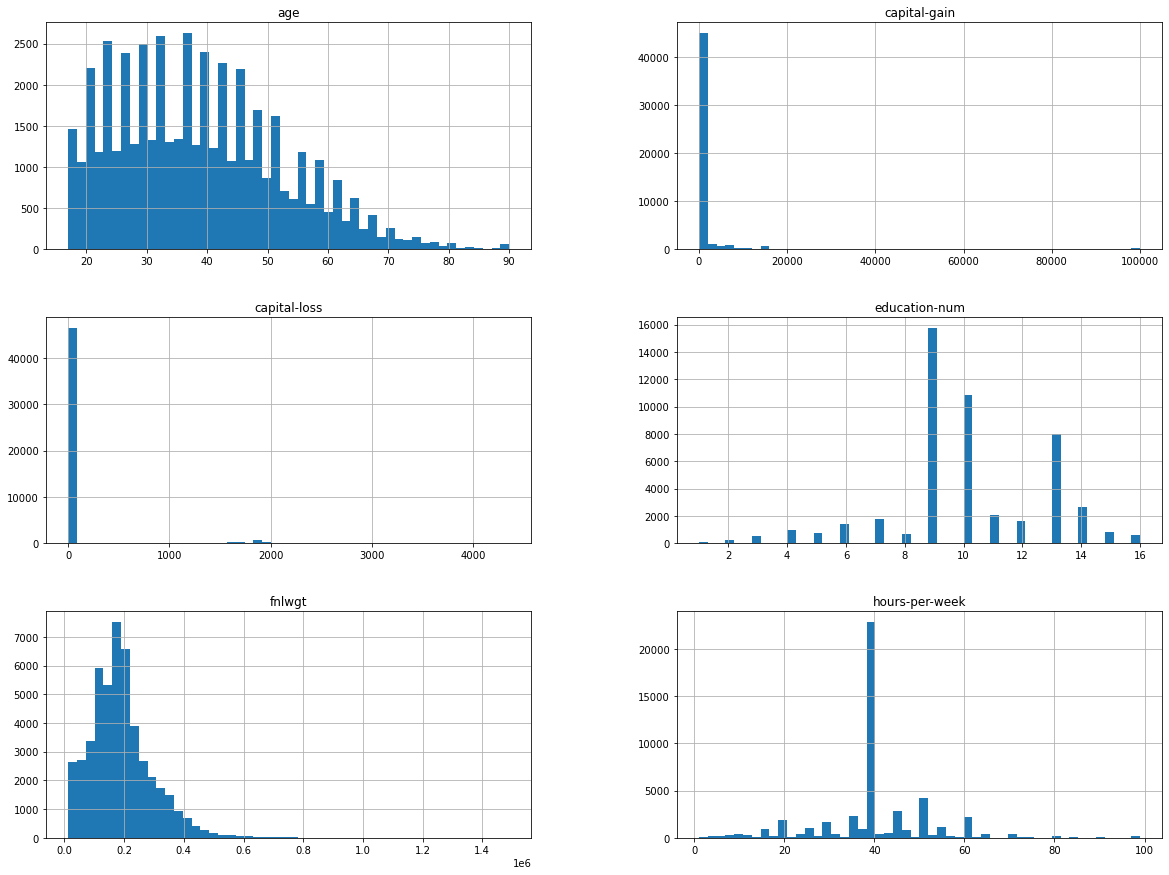

In [7]:
adults.hist(bins = 50, figsize = (20,15), column = ['age','fnlwgt','education-num','capital-gain','capital-loss',
                                                    'hours-per-week'])
plt.show()

Observations:
1. capital-gain and capital-loss are **tail heavy** and the **values have been capped**

## Analysing categorical data

In [8]:
cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex',
           'native-country']

for cols in cat_cols:
    print(adults[cols].value_counts(),'\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales             

We need to perform **one-hot encoding** on the above the columns

## Computing the correlation matrix between all features

In [9]:
adults_corr = adults.corr()
adults_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


## Viewing the heatmap of the correlation

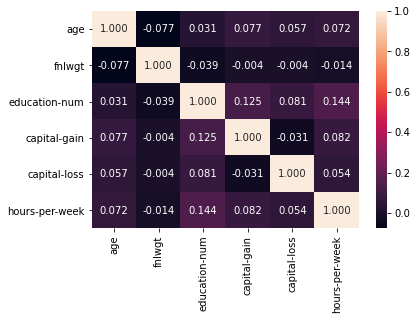

In [10]:
sns.heatmap(adults.corr(),annot=True, fmt=".3f")

Observations: 
1. The features not linearly correlated which is a good thing

## Displaying the correlation of the input features witht the targeted variable (income)

In [11]:
# adults_corr['income'].sort_values(ascending = False)

The final weight feature is the most promising as it relates closely to income

## Displaying the scatter matrix for numerical data

In [12]:
# selected_cols = ['income','education-num','age','hours-per-week']

# scatter_matrix(adults[selected_cols], figsize = (12,8))
# plt.show()

# Data Prepocessing

## Splitting into training and testing set

We split the dataset into X (features) and y (output label)

In [13]:
# Drop the income column
X = adults.drop('income', axis = 1)
y = adults['income']

print('Shape of original dataset, adults:', adults.shape)
print('Shape of X:', X.shape, 'type =', type(X))
print('Shape of y:', y.shape, 'type =', type(y))

Shape of original dataset, adults: (48842, 15)
Shape of X: (48842, 14) type = <class 'pandas.core.frame.DataFrame'>
Shape of y: (48842,) type = <class 'pandas.core.series.Series'>


Now we split X and y into training set and testing set

In [14]:
# Use train_test_split to split into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Shape of the original X:', X.shape)
print('Shape of X_train:' ,X_train.shape, ' y_train:',y_train.shape)
print('Shape of X_test:' ,X_test.shape, ' y_train:',y_test.shape)

Shape of the original X: (48842, 14)
Shape of X_train: (39073, 14)  y_train: (39073,)
Shape of X_test: (9769, 14)  y_train: (9769,)


Now we split the X_train into categorical and numerical sets

In [30]:
cat_col = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
X_train_num = X_train.drop(cat_col, axis = 1)
X_train_cat = X_train[cat_col]

print('Shape of X_train_num:', X_train_num.shape)
print('Shape of X_train_cat:', X_train_cat.shape)

Shape of X_train_num: (34189, 6)
Shape of X_train_cat: (34189, 8)


## Tackling the missing values

In [31]:
# workclass, occupation, native-country are the columns with missing values

print('Percentage of missing values for workclass: {:.3f}%'.format(
    X_train_cat['workclass'].isnull().sum() / X_train_cat['workclass'].count() * 100))
print('Percentage of missing values for occupation: {:.3f}%'.format(
    X_train_cat['occupation'].isnull().sum() / X_train_cat['occupation'].count() * 100))
print('Percentage of missing values for native-country: {:.3f}%'.format(
    X_train_cat['native-country'].isnull().sum() / X_train_cat['native-country'].count() * 100))

Percentage of missing values for workclass: 6.019%
Percentage of missing values for occupation: 6.049%
Percentage of missing values for native-country: 1.744%


Since the percentage of the missing values are all less than 10%, we will choose to **drop** them

In [32]:
X_train_cat_tr = X_train_cat.dropna()
print(X_train_cat_tr.isnull().sum())

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64


## Normalization

As we have mentioned in data analysis, we need to perform standardization as the scales are too large

We will use StandardScaler provided by sklearn

In [50]:
scaler = StandardScaler()
X_train_num_tr = scaler.fit_transform(X_train_num)

print(X_train_num_tr.mean (axis = 0))
print(X_train_num_tr.std (axis = 0))

[ 7.31554134e-17 -1.34880294e-16 -2.51419777e-16  4.22929734e-17
  2.84724194e-17  2.00138248e-16]
[1. 1. 1. 1. 1. 1.]


## Performing One-hot encoding

We will use LabelBinarizer to transform the categorical data

In [52]:
X_train_cat_tr_lb = pd.get_dummies(X_train_cat_tr)
encoded_fea = list(X_train_cat_tr_lb)
print('{} total features after one-hot encoding.'.format(len(encoded_fea)))
encoded_fea

97 total feature after one-hot encoding.


['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Oth

## Changing y_train into a boolean vector

In [18]:
y_train_more50K = (y_train == '<=50K')
y_test_more50K = (y_test == '>50K')

# Performing Classification

## Model Selection

We have chosen to use
1. Decision Tree
2. RandomForest
3. Stochastic Gradient Descent Classfier
4. Logistic Regression

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state = 42)